# House Price Prediction 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data_df = pd.read_csv('Data/HousePrices.csv')
data_df = data_df.set_index("id")
data_df["date"] = pd.to_datetime(data_df["date"])

# Exploratory Data Analysis

In [3]:
data_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data_df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21613.0,540088.141767,75000.0,321950.0,450000.0,645000.0,7700000.0,367127.196483
bedrooms,21613.0,3.370842,0.0,3.0,3.0,4.0,33.0,0.930062
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
sqft_living,21613.0,2079.899736,290.0,1427.0,1910.0,2550.0,13540.0,918.440897
sqft_lot,21613.0,15106.967566,520.0,5040.0,7618.0,10688.0,1651359.0,41420.511515
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
waterfront,21613.0,0.007542,0.0,0.0,0.0,0.0,1.0,0.086517
view,21613.0,0.234303,0.0,0.0,0.0,0.0,4.0,0.766318
condition,21613.0,3.40943,1.0,3.0,3.0,4.0,5.0,0.650743


In [5]:
min_house_price = data_df["price"].min()
max_house_price = data_df["price"].max()
ninety_pecentile = data_df["price"].quantile(q=0.9)

print(f"The min house price is {int(min_house_price)}.\n\
The 90th percentile house price is {int(ninety_pecentile)}.\
\nThe max house price is {int(max_house_price)}.")

The min house price is 75000.
The 90th percentile house price is 887000.
The max house price is 7700000.


In [6]:
# Visualise the skew of the prices

price_skew = data_df['price'].skew()

fig = px.histogram(data_df, x='price')
fig.update_layout(title=f"Price Distribution (skew={price_skew:.2f})", title_x=0.5)
fig.show()

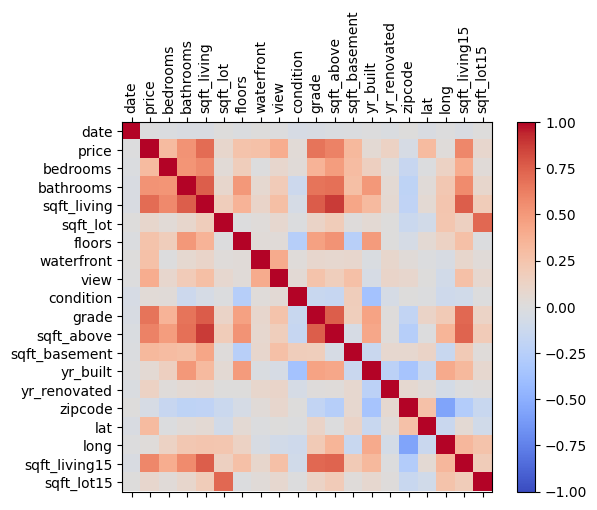

In [7]:
# Show correlations between variables

corr = data_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_df.columns)
ax.set_yticklabels(data_df.columns)
plt.show()

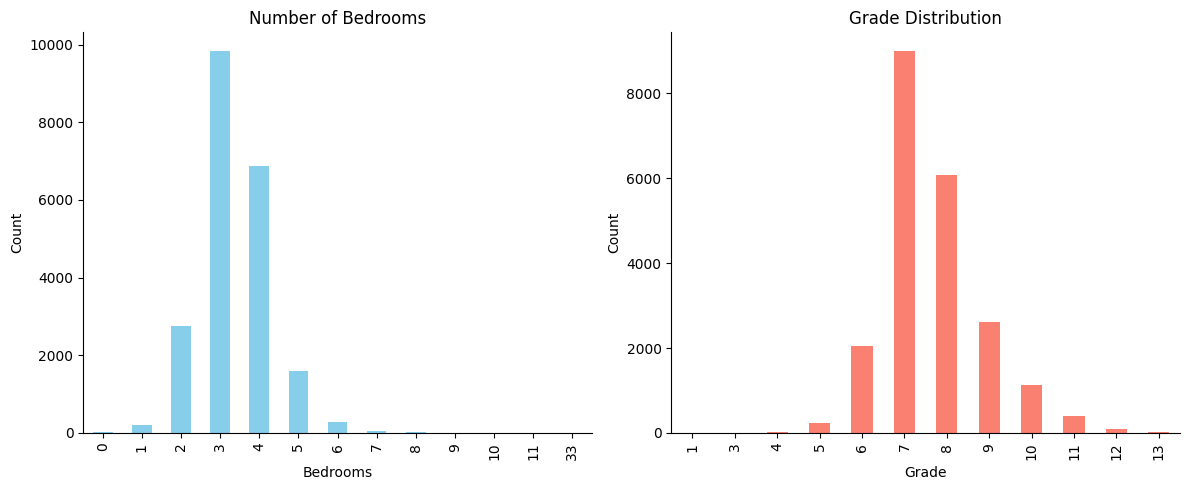

In [8]:
# --- Data prep ---
bedroom_counts = data_df['bedrooms'].value_counts().sort_index()
grade_counts = data_df['grade'].value_counts().sort_index()

# --- Create subplots: 1 row, 2 columns ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Left: Bedrooms bar chart ---
bedroom_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Number of Bedrooms')
axes[0].set_xlabel('Bedrooms')
axes[0].set_ylabel('Count')
sns.despine(ax=axes[0])

# --- Right: Grade histogram ---
grade_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Grade Distribution')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Count')
sns.despine(ax=axes[1])

# --- Layout ---
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

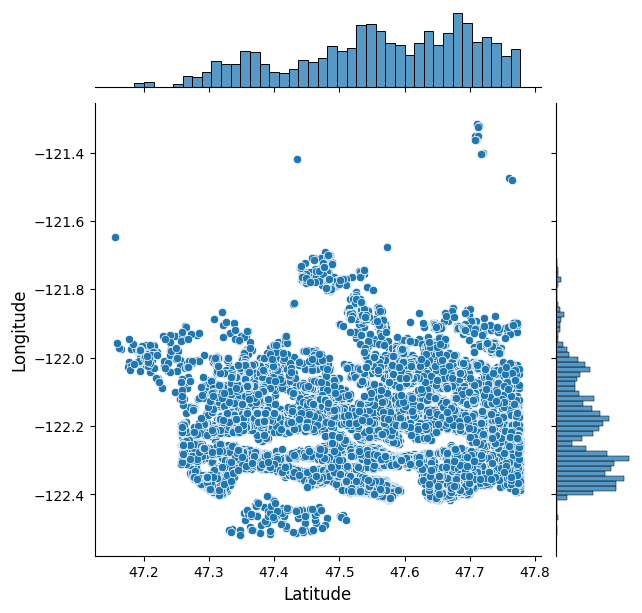

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [9]:
# Latitude and Longitude

plt.figure()
sns.jointplot(x=data_df.lat.values, y=data_df.long.values)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude',fontsize=12)
plt.show()
sns.despine

# Feature Engineering

In [10]:
# remove outliers

ninety_five_percentile = data_df["price"].quantile(.95)
filtered_df = data_df[data_df["price"] <= ninety_five_percentile]

print(f"Dropped {len(data_df) - len(filtered_df)} of {len(data_df)} rows.")

Dropped 1081 of 21613 rows.


In [11]:
# add column for price per square foot

filtered_df['price_per_sqft'] = filtered_df['price']/filtered_df['sqft_living']

C:\Users\barry\AppData\Local\Temp\ipykernel_39124\3563124486.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
X = filtered_df.copy()
X = X.drop(columns=["price", "date"]) # date is metadaa
y = filtered_df["price"]

In [13]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [14]:
# feature normalisation 

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

linear model coefficents (w): [194197.71501257  66831.42894699 689819.1465031   25290.47690855
  15008.13492003  30363.52317541  41878.41398395  51683.10451784
 255061.64237357 625785.55225518 231418.55977649 -40367.32036705
  20327.32698943 -12664.54710848  77297.15269298  25985.86677795
  27941.23183674 -61382.45294047 995995.65822868]
linear model intercept (b): -292394.173
R-squared score (training): 0.910
R-squared score (test): 0.903


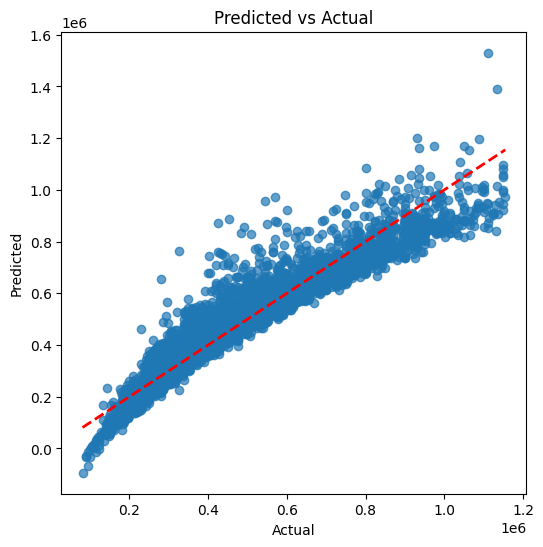

In [15]:
linreg = LinearRegression().fit(X_train_scaled, y_train)

print(f"linear model coefficents (w): {linreg.coef_}")
print(f"linear model intercept (b): {linreg.intercept_:.3f}")
print(f"R-squared score (training): {linreg.score(X_train_scaled, y_train):.3f}")
print(f"R-squared score (test): {linreg.score(X_test_scaled, y_test):.3f}")

y_pred = linreg.predict(X_test_scaled)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

# Ridge Regression

linear model coefficents (w): [114669.88264832 110557.65153635 604235.46206733  24690.06331386
  28885.82162033  31605.27687712  48105.22519404  56758.20161175
 287722.68312866 542984.36155845 217655.34269477 -55332.66872243
  22184.79784338 -15167.68201215  97902.62228594  21071.1788841
  85571.78359164 -17718.65429594 910120.67662451]
linear model intercept (b): -283965.239
R-squared score (training): 0.908
R-squared score (test): 0.902


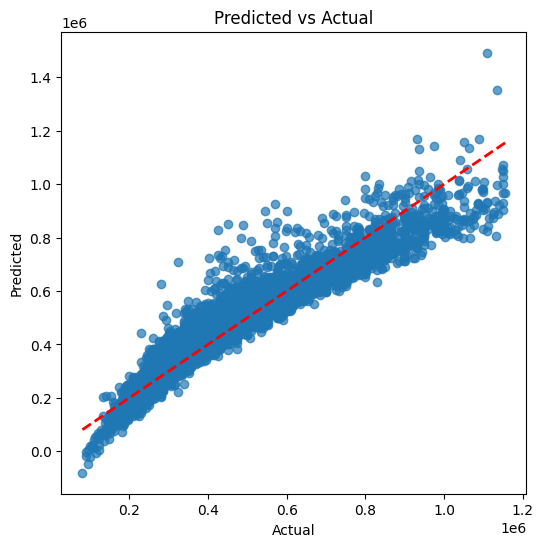

In [16]:
lin_ridge = Ridge(alpha=10).fit(X_train_scaled, y_train)

print(f"linear model coefficents (w): {lin_ridge.coef_}")
print(f"linear model intercept (b): {lin_ridge.intercept_:.3f}")
print(f"R-squared score (training): {lin_ridge.score(X_train_scaled, y_train):.3f}")
print(f"R-squared score (test): {lin_ridge.score(X_test_scaled, y_test):.3f}")

y_pred = lin_ridge.predict(X_test_scaled)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

Ridge regression: effect of alpha regularization parameter:

Alpha = 0.00
  R² train: 0.910, R² test: 0.903

Alpha = 1.00
  R² train: 0.910, R² test: 0.903

Alpha = 10.00
  R² train: 0.908, R² test: 0.902

Alpha = 20.00
  R² train: 0.903, R² test: 0.898

Alpha = 50.00
  R² train: 0.885, R² test: 0.882

Alpha = 100.00
  R² train: 0.856, R² test: 0.854

Alpha = 1000.00
  R² train: 0.542, R² test: 0.544



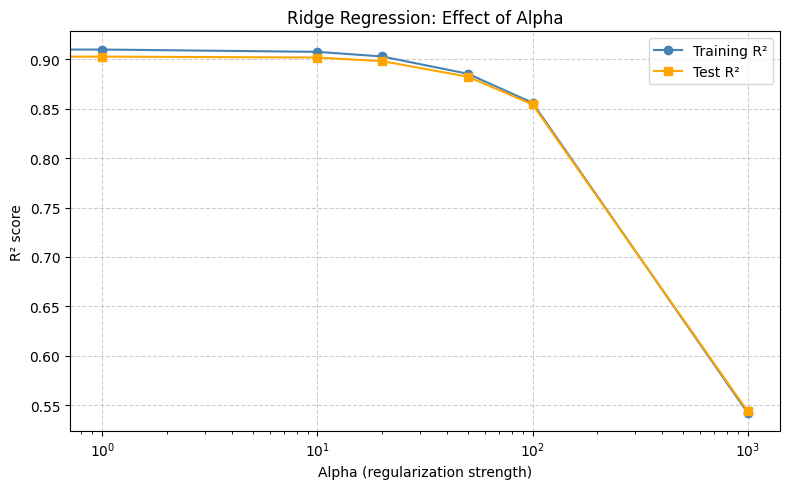

In [17]:
alphas = [0, 1, 10, 20, 50, 100, 1000]

r2_train_list = []
r2_test_list = []

print('Ridge regression: effect of alpha regularization parameter:\n')

for this_alpha in alphas:
    lin_ridge = Ridge(alpha=this_alpha).fit(X_train_scaled, y_train)
    r2_train = lin_ridge.score(X_train_scaled, y_train)
    r2_test = lin_ridge.score(X_test_scaled, y_test)

    # store results for plotting
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

    print(f"Alpha = {this_alpha:.2f}")
    print(f"  R² train: {r2_train:.3f}, R² test: {r2_test:.3f}\n")

# --- Plot R² vs alpha ---
fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(alphas, r2_train_list, 'o-', label='Training R²', color='steelblue')
ax1.plot(alphas, r2_test_list, 's-', label='Test R²', color='orange')
ax1.set_xlabel('Alpha (regularization strength)')
ax1.set_ylabel('R² score')
ax1.set_xscale('log')
ax1.set_title('Ridge Regression: Effect of Alpha')
ax1.legend(loc='best')
ax1.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Lasso Regression 

linear model coefficents (w): [ 190708.83715954   66891.10647805 1330650.3079669    19381.18260134
   14932.01100061   29702.10119926   41880.51157158   51636.56906391
  254865.28089313       0.           15229.07766487  -40296.93945622
   20292.51662437  -12678.57438201   77297.36501609   25681.53512912
   27819.57396336  -54139.41732629  995861.45599502]
linear model intercept (b): -291957.381
R-squared score (training): 0.910
R-squared score (test): 0.903


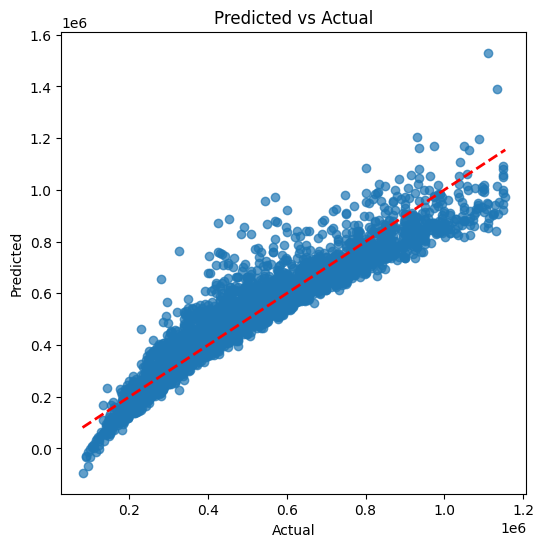

In [18]:
lin_lasso = Lasso(alpha=2, max_iter=10000).fit(X_train_scaled, y_train)

print(f"linear model coefficents (w): {lin_lasso.coef_}")
print(f"linear model intercept (b): {lin_lasso.intercept_:.3f}")
print(f"R-squared score (training): {lin_lasso.score(X_train_scaled, y_train):.3f}")
print(f"R-squared score (test): {lin_lasso.score(X_test_scaled, y_test):.3f}")

y_pred = lin_lasso.predict(X_test_scaled)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

Lasso regression: effect of alpha regularization parameter:

Alpha = 0.50
Features kept: 18, r-squared training: 0.910, r-squared test: 0.903

Alpha = 1.00
Features kept: 18, r-squared training: 0.910, r-squared test: 0.903

Alpha = 2.00
Features kept: 18, r-squared training: 0.910, r-squared test: 0.903

Alpha = 3.00
Features kept: 18, r-squared training: 0.910, r-squared test: 0.903

Alpha = 5.00
Features kept: 18, r-squared training: 0.910, r-squared test: 0.903

Alpha = 10.00
Features kept: 17, r-squared training: 0.910, r-squared test: 0.903

Alpha = 20.00
Features kept: 17, r-squared training: 0.910, r-squared test: 0.903

Alpha = 50.00
Features kept: 16, r-squared training: 0.910, r-squared test: 0.902



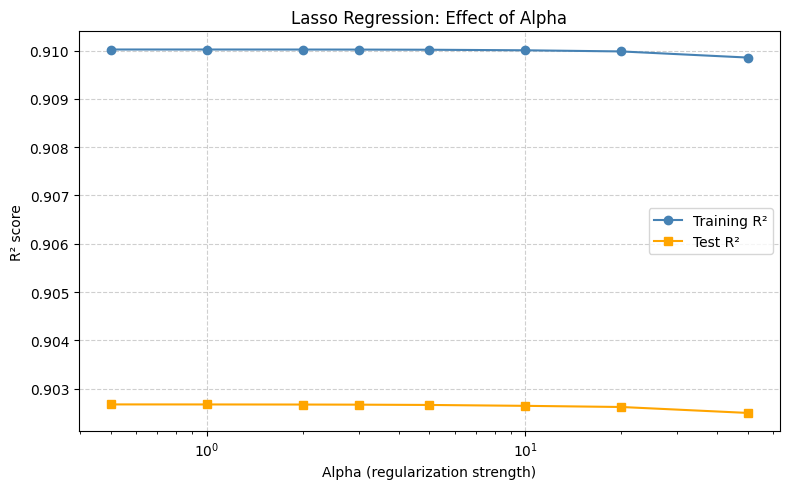

In [19]:
alphas = [0.5, 1, 2, 3, 5, 10, 20, 50]

r2_train_list = []
r2_test_list = []

print('Lasso regression: effect of alpha regularization parameter:\n')

for this_alpha in alphas:
    lin_lasso = Lasso(alpha=this_alpha, max_iter=10000).fit(X_train_scaled, y_train)
    r2_train = lin_lasso.score(X_train_scaled, y_train)
    r2_test = lin_lasso.score(X_test_scaled, y_test)

    # store results for plotting
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.3f}, \
r-squared test: {:.3f}\n'
         .format(this_alpha, np.sum(lin_lasso.coef_ != 0), r2_train, r2_test))

# --- Plot R² vs alpha ---
fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(alphas, r2_train_list, 'o-', label='Training R²', color='steelblue')
ax1.plot(alphas, r2_test_list, 's-', label='Test R²', color='orange')
ax1.set_xlabel('Alpha (regularization strength)')
ax1.set_ylabel('R² score')
ax1.set_xscale('log')
ax1.set_title('Lasso Regression: Effect of Alpha')
ax1.legend(loc='best')
ax1.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Polynomial Regression

Lasso regression: effect of alpha regularization parameter:

Alpha = 1.00
Features kept: 209, r-squared training: 1.000, r-squared test: 1.000

Alpha = 5.00
Features kept: 209, r-squared training: 1.000, r-squared test: 1.000

Alpha = 10.00
Features kept: 209, r-squared training: 0.999, r-squared test: 0.999

Alpha = 20.00
Features kept: 209, r-squared training: 0.998, r-squared test: 0.998

Alpha = 50.00
Features kept: 209, r-squared training: 0.993, r-squared test: 0.992



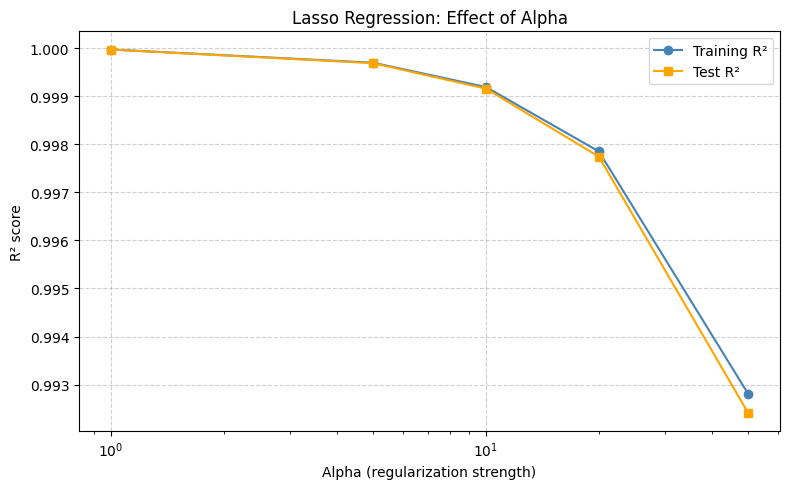

In [20]:
# Transform the original input data to add polynomial features up to degree 2 

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)

# feature normalisation 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


alphas = [1, 5, 10, 20, 50]

r2_train_list = []
r2_test_list = []

print('Lasso regression: effect of alpha regularization parameter:\n')

for this_alpha in alphas:
    lin_lasso = Ridge(alpha=this_alpha, max_iter=10000).fit(X_train_scaled, y_train)
    r2_train = lin_lasso.score(X_train_scaled, y_train)
    r2_test = lin_lasso.score(X_test_scaled, y_test)

    # store results for plotting
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.3f}, \
r-squared test: {:.3f}\n'
         .format(this_alpha, np.sum(lin_lasso.coef_ != 0), r2_train, r2_test))

# --- Plot R² vs alpha ---
fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(alphas, r2_train_list, 'o-', label='Training R²', color='steelblue')
ax1.plot(alphas, r2_test_list, 's-', label='Test R²', color='orange')
ax1.set_xlabel('Alpha (regularization strength)')
ax1.set_ylabel('R² score')
ax1.set_xscale('log')
ax1.set_title('Lasso Regression: Effect of Alpha')
ax1.legend(loc='best')
ax1.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()